In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('email_table.csv')

In [3]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,converted
0,85120,short_email,personalized,2,Sunday,US,5,0
1,966622,long_email,personalized,12,Sunday,UK,2,1
2,777221,long_email,personalized,11,Wednesday,US,2,0
3,493711,short_email,generic,6,Monday,UK,1,0
4,106887,long_email,generic,14,Monday,US,6,0


In [4]:
df.count()

email_id               100000
email_text             100000
email_version          100000
hour                   100000
weekday                100000
user_country           100000
user_past_purchases    100000
converted              100000
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier


In [7]:
del df['email_id']

dummification

In [21]:
df_new=pd.get_dummies(data=df)

In [22]:
df_new.columns

Index(['hour', 'user_past_purchases', 'converted', 'email_text_long_email',
       'email_text_short_email', 'email_version_generic',
       'email_version_personalized', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'user_country_ES',
       'user_country_FR', 'user_country_UK', 'user_country_US'],
      dtype='object')

In [24]:
X=df_new.iloc[:,df_new.columns != 'converted']

In [25]:
y=df_new['converted']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [27]:
c=DecisionTreeClassifier().fit(X_train,y_train)

In [29]:
c.score(X_train,y_train)

0.98198571428571424

In [30]:
c.score(X_test,y_test)

0.9734666666666667

In [31]:
from sklearn.metrics import classification_report

In [37]:
y_preds = c.predict(X_test)

In [38]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99     29390
          1       0.05      0.02      0.03       610

avg / total       0.96      0.97      0.97     30000



In [35]:
from sklearn.metrics import roc_curve, auc

In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)


roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.50566491334735253

## Hyper parameter tunning

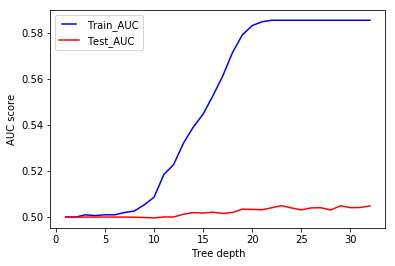

In [52]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   c = DecisionTreeClassifier(max_depth=max_depth)
   c.fit(X_train, y_train)
   train_pred = c.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_preds =c.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths,train_results,'b',label="Train_AUC")
line2, = plt.plot(max_depths, test_results,'r', label="Test_AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

So, we can chose max_depth as 24

## Min sample split

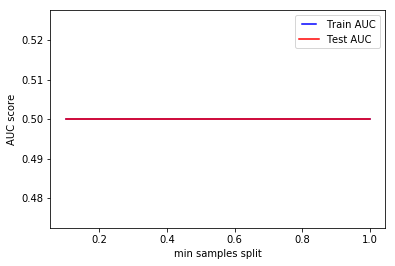

In [57]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   c = DecisionTreeClassifier(min_samples_split=min_samples_split)
   c.fit(X_train, y_train)
   train_pred = c.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_preds = c.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

# Min sample Leaf

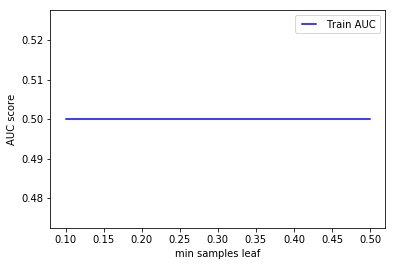

In [60]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   c = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   c.fit(X_train, y_train)
   train_pred = c.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_preds = c.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

In [62]:
c=DecisionTreeClassifier(max_depth=24).fit(X_train,y_train)
print(c.score(X_train,y_train))
print(c.score(X_test,y_test))

0.981985714286
0.9738
